In [3]:
import numpy
import matplotlib.pyplot as plt
import plotly, pandas, scipy, sklearn, torch
import plotly.express as px

Question 1 - Basic <br> 
Bishop #1.3<br> 
Suppose that we have three coloured boxes r (red), b (blue), and g (green). Box r contains 3 apples, 4 oranges, and 3 limes, box b contains 1 apple, 1 orange, and 0 limes, and box g contains 3 apples, 3 oranges, and 4 limes. If a box is chosen at random with probabilities p(r) = 0.2, p(b) = 0.2, p(g) = 0.6, and a piece of fruit is removed from the box (with equal probability of selecting any of the items in the box), then what is the probability of selecting an apple? If we observe that the selected fruit is in fact an orange, what is the probability that it came from the green box?<br> 

Using Counting Method:
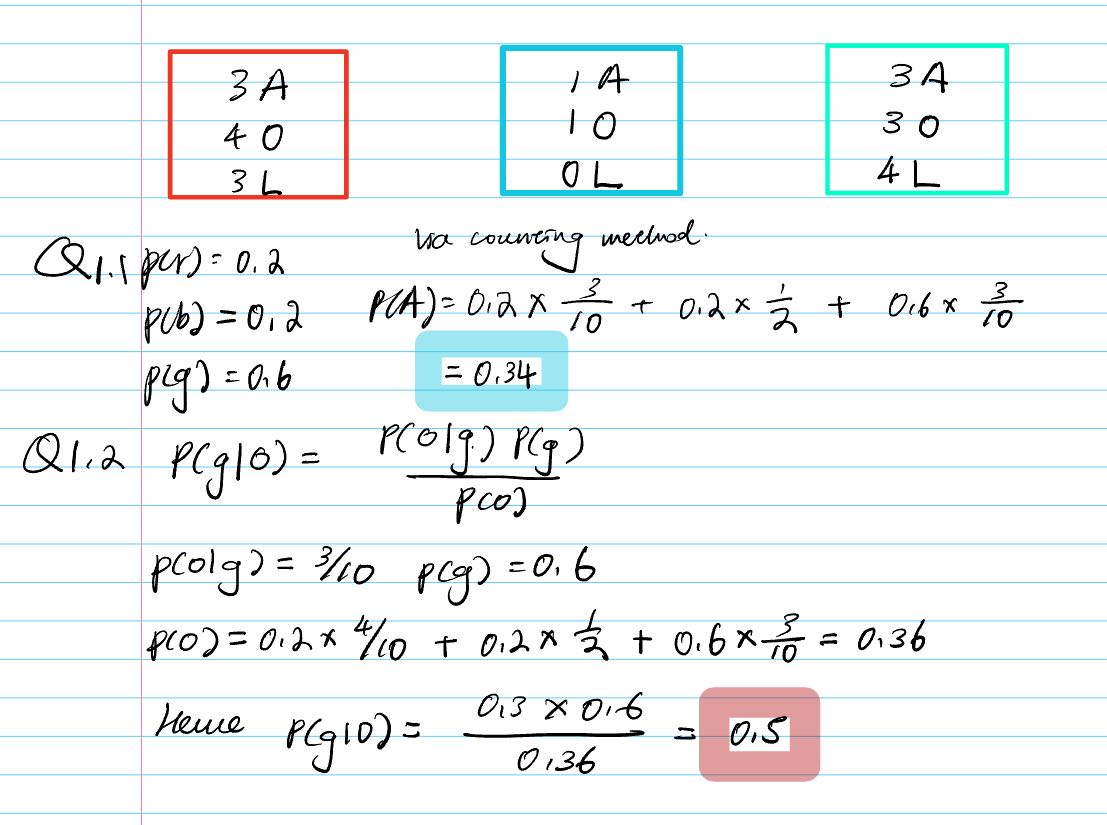

Question 2 – Probability Distributions <br> 
Bishop #2.7 <br> 


Consider a binomial random variable x given by (2.9), with prior distribution for μ given by the beta distribution (2.13), and suppose we have observed m occurrences of x = 1 and l occurrences of x = 0. Show that the posterior mean value of x lies between the prior mean and the maximum likelihood estimate for μ. To do this, show that the posterior mean can be written as λ times the prior mean plus (1 − λ) times the maximum likelihood estimate, where 0 <= λ <= 1. This illustrates the concept of the posterior distribution being a compromise between the prior distribution and the maximum likelihood solution. <br> 
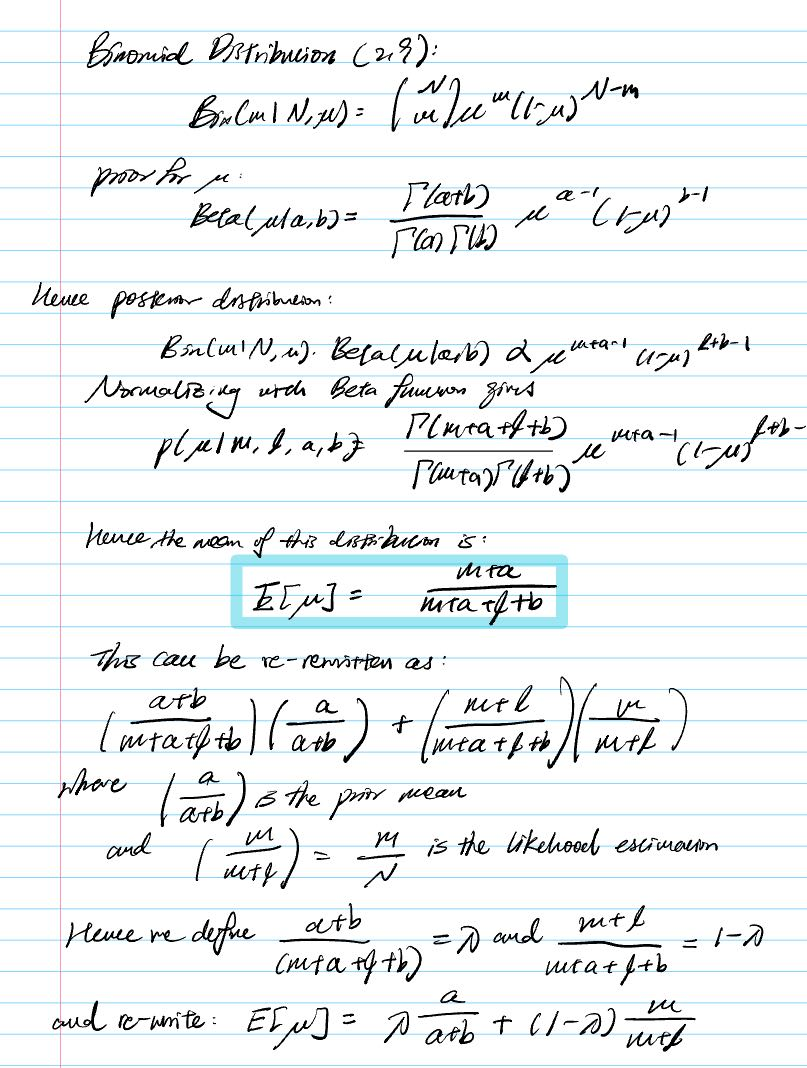 <br>




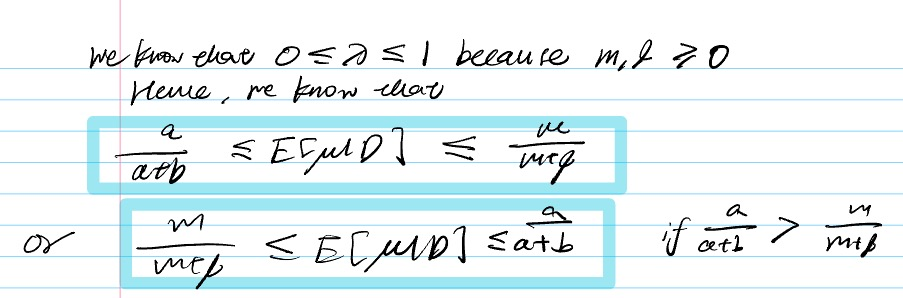

Question 3 – Regression <br>

Bishop #3.11 <br>

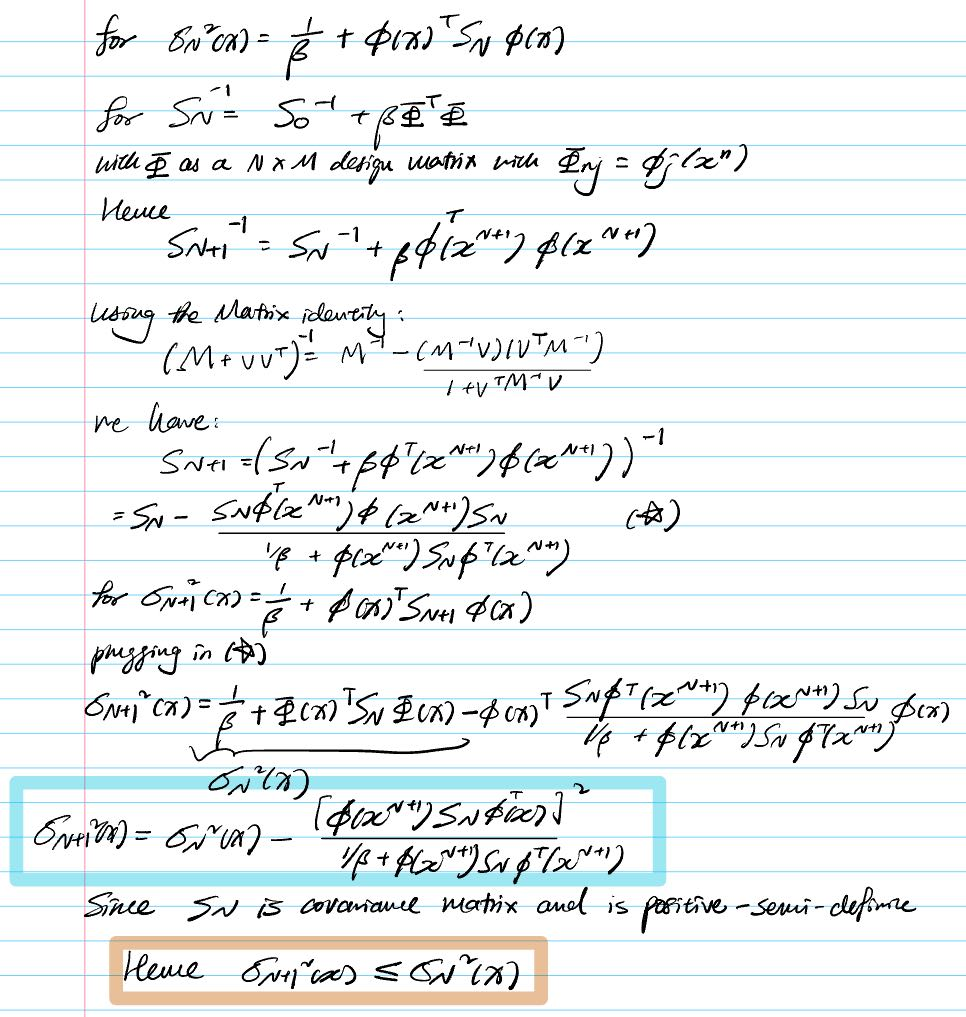

Question 4 – Distributions and Computation <br>

Sethna #1.5 (Stirling and Asymptotic Series)


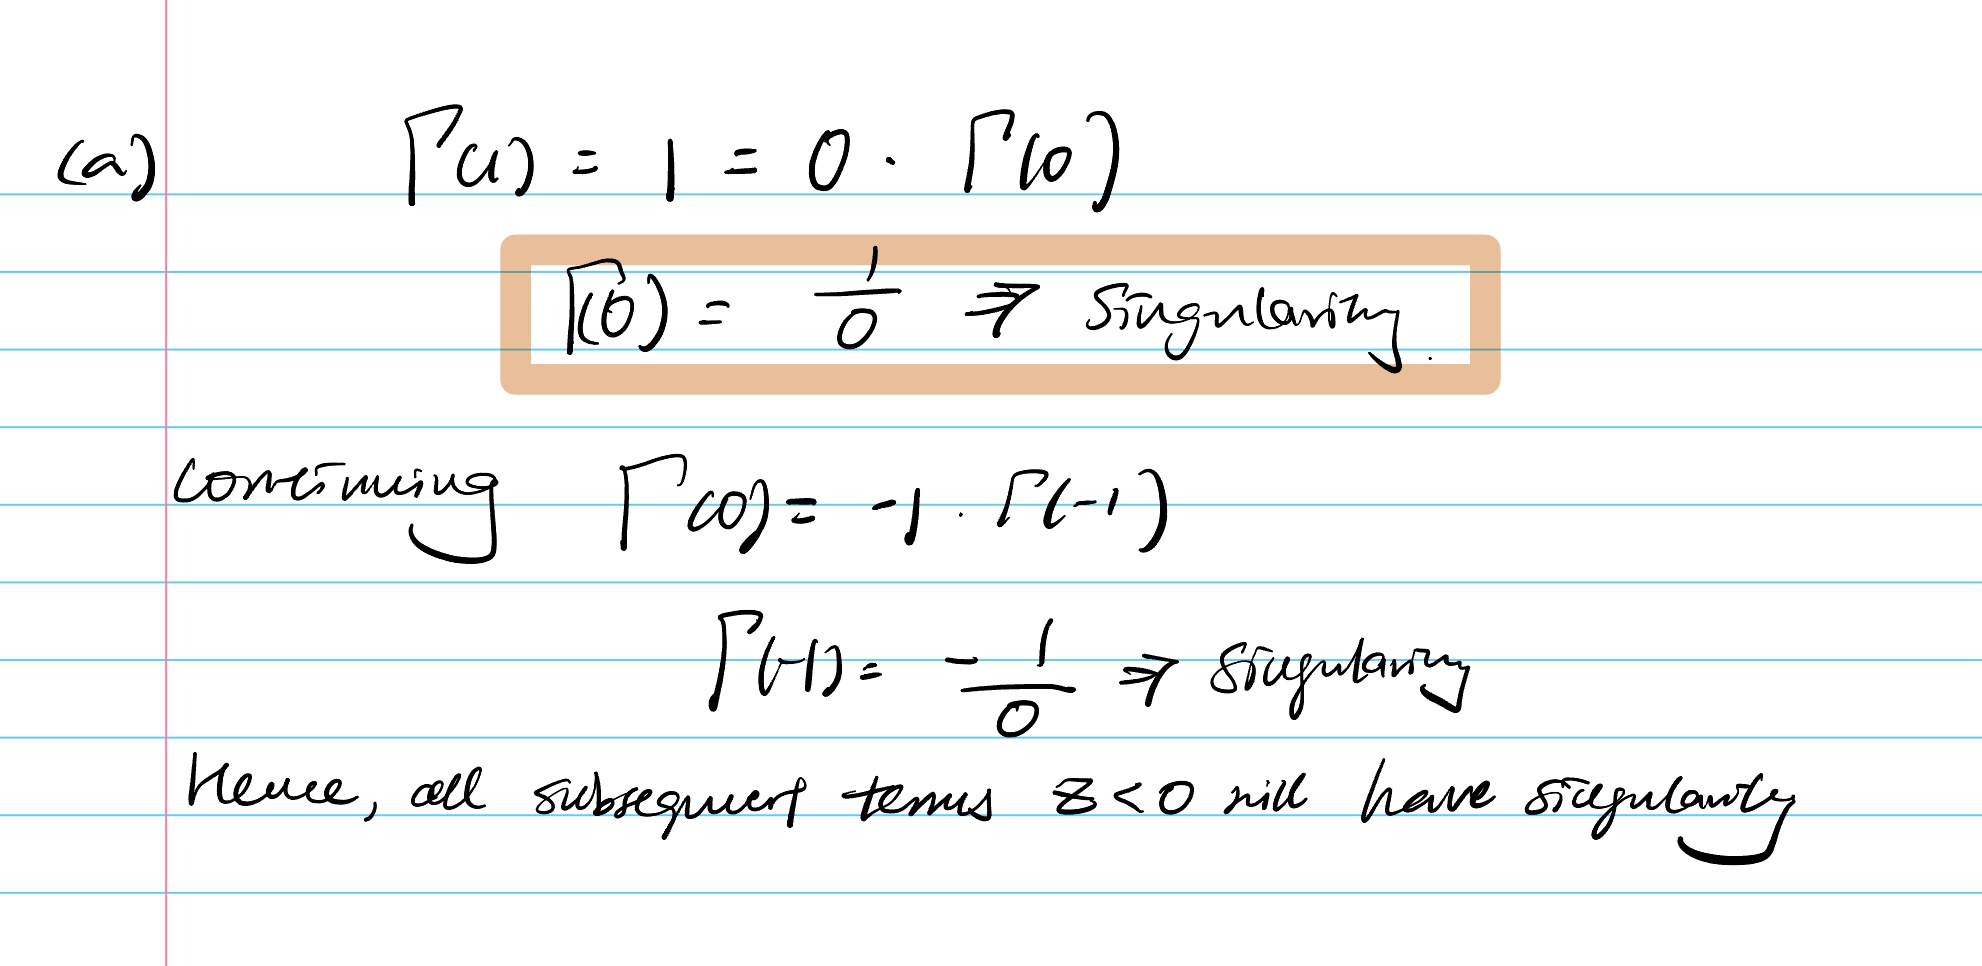

In [177]:
from scipy import *

def gammaStirlingStandard(z):
    return np.sqrt(2*np.pi/z) * z**z * np.exp(-z)

StirlingCoefs = [1, 1/12, 1/288, -139/51840, -571/2488320, 163879/209018880, 
     5246819/75246796800, -534703531/902961561600, 
     -4483131259/86684309913600, 432261921612371/514904800886784000, 
     6232523202521089/86504006548979712000, -25834629665134204969/
      13494625021640835072000, -1579029138854919086429/
      9716130015581401251840000, 746590869962651602203151/
      116593560186976815022080000, 1511513601028097903631961/
      2798245444487443560529920000, -8849272268392873147705987190261/
      299692087104605205332754432000000, -142801712490607530608130701097701/
      57540880724084199423888850944000000, 
     2355444393109967510921431436000087153/
      13119320805091197468646658015232000000, 
     2346608607351903737647919577082115121863/
      155857531164483425927522297220956160000000, 
     -2603072187220373277150999431416562396331667/
      1870290373973801111130267566651473920000000, 
     -73239727426811935976967471475430268695630993/
      628417565655197173339769902394895237120000000, 
     34856851734234401648335623107688675640839679447003/
      2601648721812516297626647395914866281676800000000, 
     909773124599542506852275229422593983242880452145053/
      811714401205505084859513987525438279883161600000000, 
     -1527335577854677023023224272800947125313629267269390501/
      9740572814466061018314167850305259358597939200000000, 
     -183856455668177802003316143799518064719008299958634826921/
      14026424852831127866372401704439573476381032448000000000, 
     2583312098861137963745902036370496943872138148651712093816393/
      1178219687637814740775281743172924172016006725632000000000, 
     5180134290822682443757710427952467581918233549140896702364013/
      28277272503307553778606761836150180128384161415168000000000, 
     -527550309097873396592733540579928993424142983691519876840948418433873/
      14613128884259277641708402381685690086746366936130519040000000000, 
     -2114866241537081164613223324215572812504648703648482437460602956015127/
      701430186444445326802003314320913124163825612934264913920000000000, 
     180394412915538782140015777241228025103785450235726235175126981743099027459/260932029357333661570345232927379682188943128011546547978240000000000, 
     3226140192053936286912811949056082647586604417173687729452086326364208020303641/
      55891640688340870308367948893044727924871618020073270576939008000000000000,
 -10218654456520534088469164280902985100842191028132480093114328858063973003580356809/
      670699688260090443700415386716536735098459416240879246923268096000000000000,
 -11294270192060551526555825418377569122875449049360883617198277415758886356961061261/
      8880988975581887254515845120660348492338221235741297614432239616000000000000,
 230728480231290522008048001606562350241176825393088090041361149344312886801922569309571253/602663911882986869091445249888011248690071693057404456115371780341760000000000000,
 8780281712344249180626150512221439934592746549863336386520284834871601659328384283145974399/274814743818642012305699033948933129402672692034176431988609531835842560000000000000, 
     -65055679003182430423234281865622332849269489661844508633433219901904175381055443012118665958239159/5978869566518375619722788182592989163284547087895542454344188974620590735360000000000000,
 -4160439817028779676022608475860808455203802493147838405248227514580847308149550626237967072257979519/4582514222596019507245595071561594274827123832528970603716707420547910834585600000000000000,
 25739595107049129518438458090403692183654984839076592277587399621277514087385399113875378525247018408357/74117186556770402465015711592213611749377828943512046286200659149731427411558400000000000000,
 1185356971130098386071769043814501538538935809024244586455334462229374012405477660247088667012987822132001/40912686979337262160688672798901913685656561576818649549982763850651747931180236800000000000000,
 -3734458725948069000883071068850009040874034770684071766694513626567994145012490009440208988682451631689349911503/301935629907508994745882405255896123000145424436921633678872797217809899732110147584000000000000000]

def gammaStirling(n,z):
    if n < len(StirlingCoefs):
        return gammaStirlingStandard(z)*sum([(1/z)**(n) * StirlingCoefs[m] for m in range(n)])
    else:
        print("n too big")

        
def gfunction(n,z):
    if n < len(StirlingCoefs):
        return gammaStirlingStandard(1/z)*sum([(z)**(n) * StirlingCoefs[m] for m in range(n)])
    else:
        print("n too big")
    

The poles for $g(\zeta)$ is the reciprocal of $\Gamma(1/\zeta)$. Hence, we evaluate the inverse of negative integers up to 100. We see that those quickly converges to 0. Hence radius of convergence of Stirling’s formula applied to $g$ must be zero.

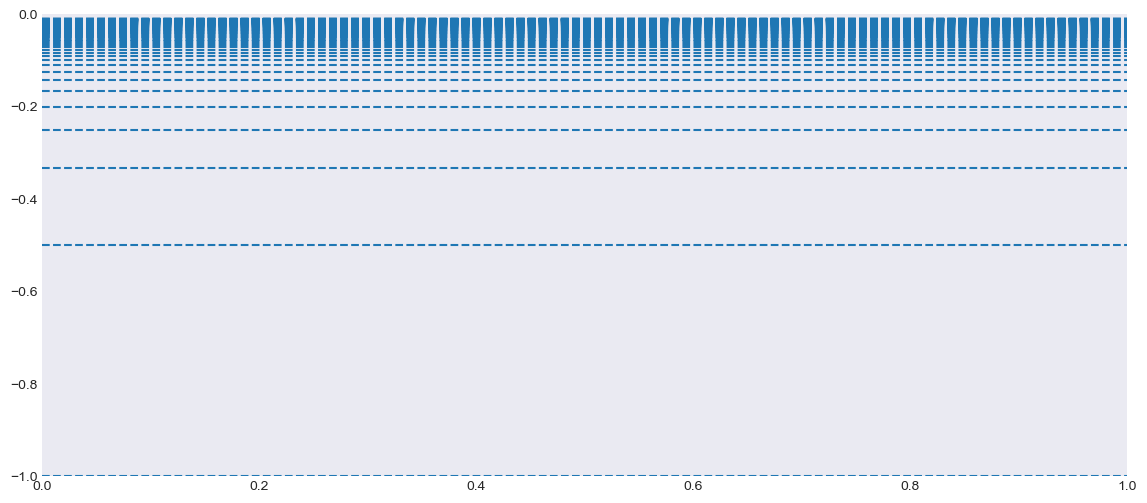

In [188]:
poles = np.arange(-100, 0, 1) #gamma singularity
[plt.axhline(y=i, linestyle='--') for i in 1/poles]
plt.ylim([-1, 0])
plt.show()


We create a list of $A_{2j+1}$ terms and evaluate the radius of convergence as $j \rightarrow \inf$. 

We evaluate the odd coefficients within the first 85 terms, and see that is radius of convergence converges towards 0.

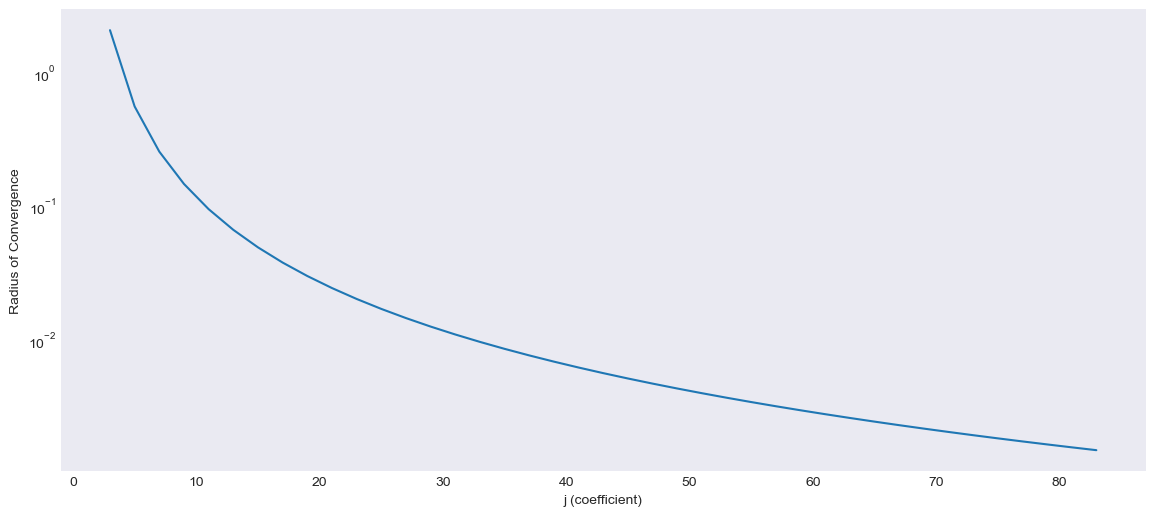

In [219]:
import math
def aj_2(j):
    return (-1)**j*2*math.factorial(2*j)/(2*np.pi)**(2*(j+1))


odd_coef = [x for x in range(85) if x%2==1]
radius_con = []
for i in range(len(odd_coef)-1):
    radius_con.append(np.sqrt(aj_2(odd_coef[i])/aj_2(odd_coef[i+1])))
plt.plot(odd_coef[1:],radius_con)
plt.xlabel('j (coefficient)')
plt.ylabel('Radius of Convergence')
plt.yscale('log')
plt.show()

Since $\Gamma(1) = (1 - 1)! = 0!$, we can evaluate $\Gamma(1)$ for the first n terms. It provides a good approximation $\Gamma(1) = 0! ~ 1$ in the first 20 terms, but diverges at larger numbers of n.

In [216]:
[[n,gammaStirling(n, 1)] for n in range(1,30)]

[[1, 0.9221370088957891],
 [2, 0.9989817596371048],
 [3, 1.0021836242513265],
 [4, 0.9997110732436776],
 [5, 0.9994994685336406],
 [6, 1.0002224601164145],
 [7, 1.0002867590126416],
 [8, 0.999740700425332],
 [9, 0.9996930094273442],
 [10, 1.0004671422665965],
 [11, 1.00053358127368],
 [12, 0.9987682066828978],
 [13, 0.9986183444224374],
 [14, 1.0045231222728797],
 [15, 1.005021228196255],
 [16, 0.9777924763819571],
 [17, 0.9755039687615623],
 [18, 1.1410645552852092],
 [19, 1.154948354329536],
 [20, -0.12848294279205152],
 [21, -0.23595457769342182],
 [22, 12.118823655141053],
 [23, 13.152358931398398],
 [24, -131.4400267701233],
 [25, -143.52727237083062],
 [26, 1878.309331517588],
 [27, 2047.2362865504329],
 [28, -31242.941876291432],
 [29, -34023.25625094252]]

Question 5 - Computation 

Sethna #8.12 (Entropy Increases! Markov Chains)

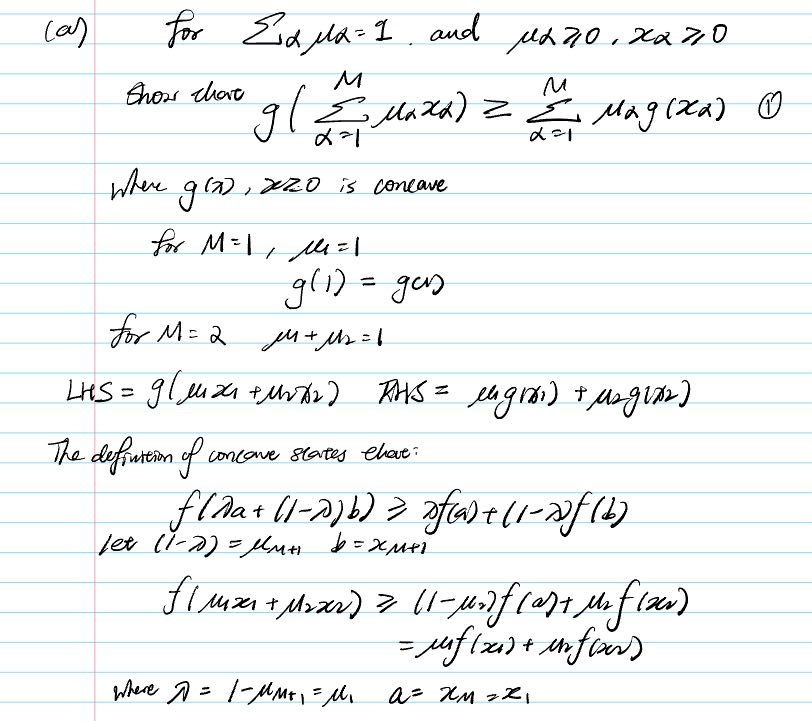

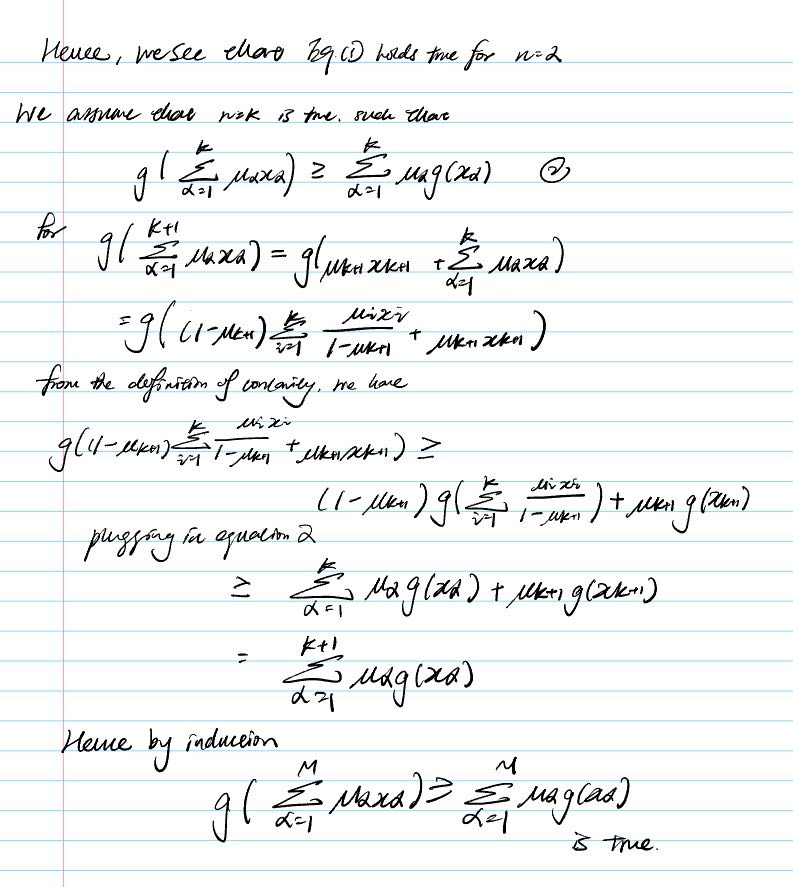

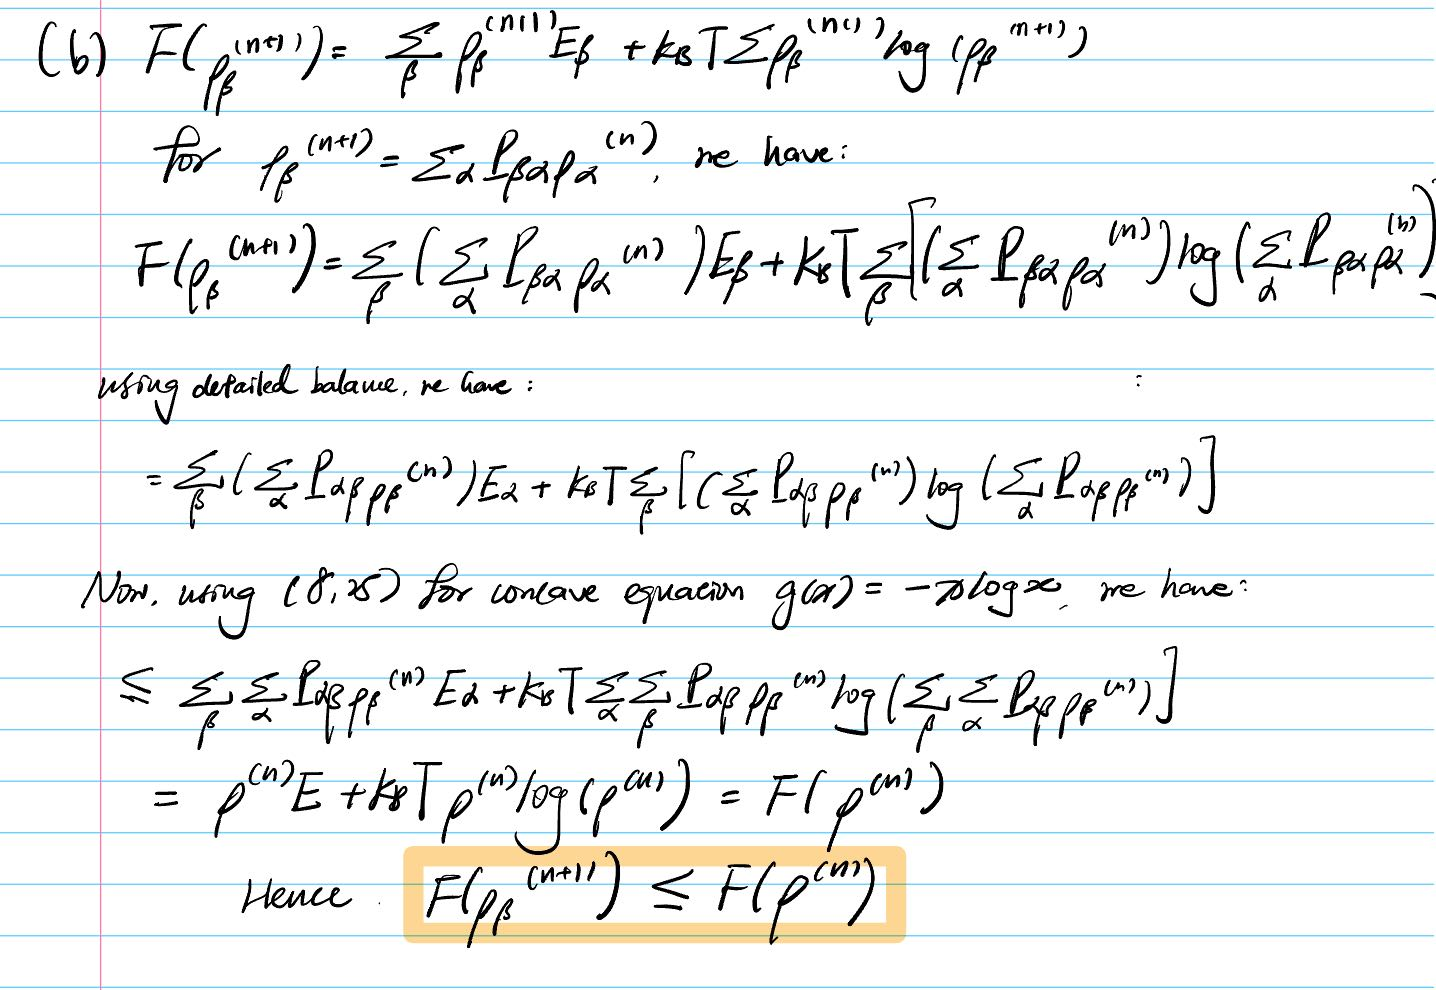

Question 6 - Hidden Markov Models <br>

Bishop #13.19

Since joint distribution encompassing all variables, latent and observed, follows a Gaussian distribution (as is the case for Kalman Filter), we have the flexibility to maximize it with respect to any chosen subset of variables. Specifically, we can either maximize it by considering all the latent variables together or maximize each of the marginal distributions separately.

From equation (2.98), we see that $p(x_a) = N(x_a | \mu_a, \sum_{aa})$, we see that the marginal distribution takes the mean variance of one axis. Since, for a Gaussian distribution, the mean and the mode (the most frequent probable outcome) coincides, the outcome would be the same if we maximize it w.r.t. the latent variables (joint distribution) jointly or maximizing with respect to individual marginal distributions.

Below we code up two marginal distribution and its joint distribution. We can see that the results are the same. 

Individual latent variables: 3.994 and 0.990. <br>
Joint sequence of latent variables: 4.01002004 1.0240481

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


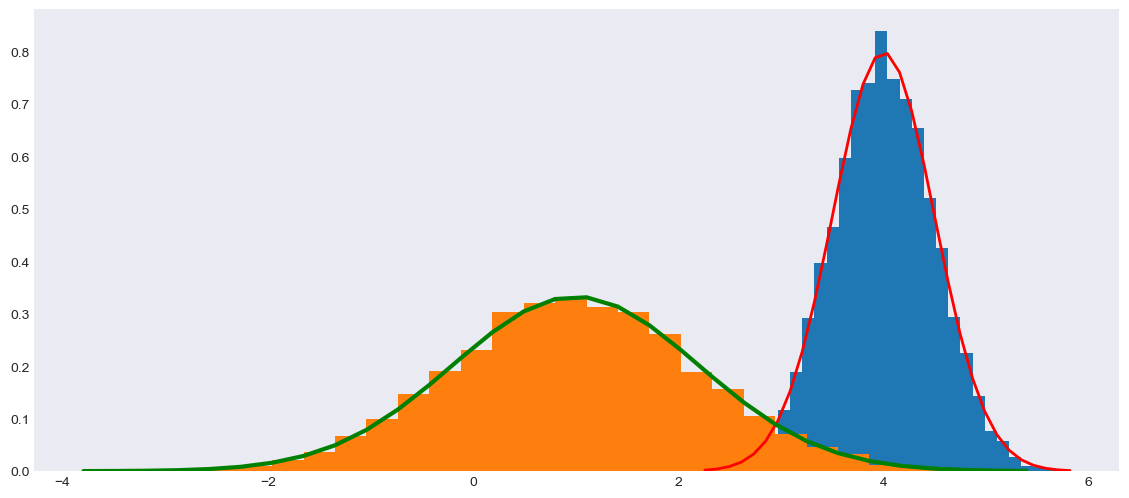

The value of z that maximizing the marginal distribution is 3.994, and 0.990 respectively


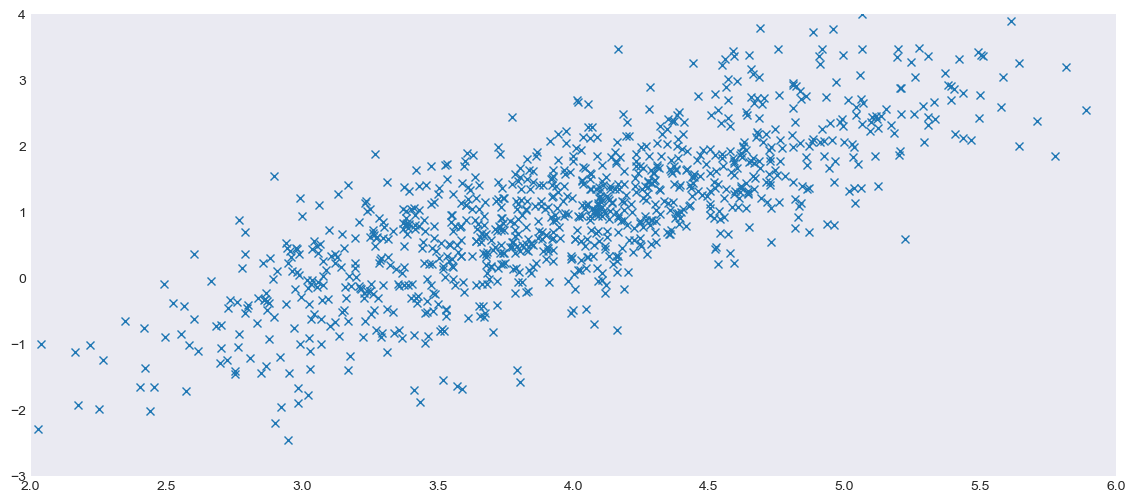

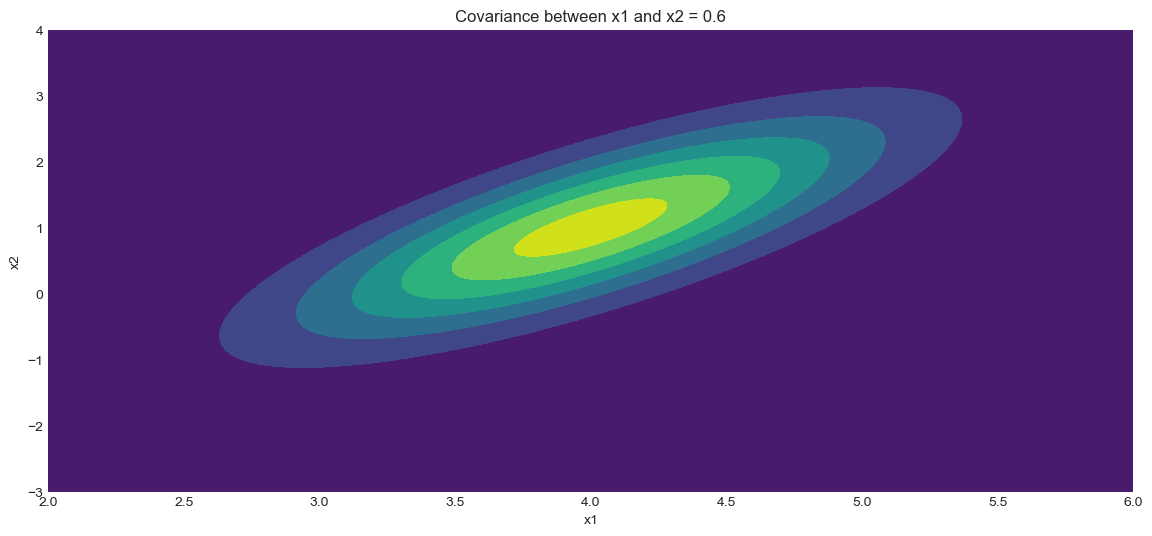

The latent variables from the joint distribution directly is:[4.01002004 1.0240481 ]


In [127]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from statistics import mode
from scipy import stats
import random

seed = random.seed(10)
mu_1, sigma_1 = 4, .5 # mean and standard deviation
s_1 = np.random.normal(mu_1, sigma_1, 10000)

count, bins, ignored = plt.hist(s_1, 30, density=True)
data_1 = 1/(sigma_1 * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu_1)**2 / (2 * sigma_1**2))
plt.plot(bins,  data_1, linewidth=2, color='r')



mu_2, sigma_2 = 1, 1.2 # mean and standard deviation
s_2 = np.random.normal(mu_2, sigma_2, 10000)

count_2, bins_2, ignored_2 = plt.hist(s_2, 30, density=True)
data_2 = 1/(sigma_2 * np.sqrt(2 * np.pi)) *np.exp( - (bins_2 - mu_2)**2 / (2 * sigma_2**2) )
plt.plot(bins_2, data_2, linewidth=3, color='g')
plt.show()


print(f'The value of z that maximizing the marginal distribution is {np.mean(s_1):.3f}, and {np.mean(s_2):.3f} respectively')

####joint distribution
mu_j = (mu_1, mu_2)
cov = np.array([[sigma_1, sigma_1*sigma_2], [sigma_1*sigma_2, sigma_2]])

x, y = np.random.multivariate_normal(mu_j, cov, 1000).T
plt.plot(x, y, 'x')
plt.xlim([2, 6])
plt.ylim([-3, 4])
plt.show()

distr = multivariate_normal(cov = cov , mean = mu_j, seed = random.seed(10))
x = np.linspace(-10*sigma_1+mu_1, 10*sigma_1+mu_1, num=500)
y = np.linspace(-10*sigma_2+mu_2, 10*sigma_2+mu_2, num=500)
X, Y = np.meshgrid(x,y)
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
plt.contourf(X, Y, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim([2, 6])
plt.ylim([-3, 4])
plt.title(f'Covariance between x1 and x2 = {sigma_1*sigma_2}')
plt.show()

xy = np.vstack([x,y])
kde = stats.gaussian_kde(xy)
density = kde(xy)


print(f'The latent variables from the joint distribution directly is:{xy.T[np.argmax(density)]}')